In [1]:
from sklearn import tree
import pandas as pd
import os
import matplotlib.pyplot as plt

from datetime import timedelta
import datetime

In [9]:
air_ml_df = pd.read_csv(os.path.join("weekly_air_data.csv"))

In [10]:
air_ml_df.head(5)

,Unnamed: 0,air_area_name,visitors,current_week
0,0,Tōkyō-to Minato-ku Shibakōen,2069,0
1,1,Tōkyō-to Minato-ku Shibakōen,2092,1
2,2,Tōkyō-to Minato-ku Shibakōen,2095,2
3,3,Tōkyō-to Minato-ku Shibakōen,1999,3
4,4,Tōkyō-to Minato-ku Shibakōen,1983,4


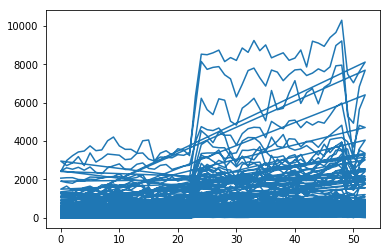

In [11]:
y = air_ml_df["visitors"]
x = air_ml_df["current_week"]

plt.plot(x,y)

In [12]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
air_ml_df["air_area_name"] = number.fit_transform(air_ml_df["air_area_name"].astype('str'))

new_ml_df = air_ml_df[["air_area_name","current_week","visitors"]]
len(new_ml_df["air_area_name"])

5459

In [13]:
air_uni = list(new_ml_df["air_area_name"].unique())


In [14]:
new_ml_df["1_week_ago_visitors"] = 0
for x in range(len(new_ml_df["air_area_name"])):
    for air_id in air_uni:
        if(new_ml_df["air_area_name"][x] == air_id):
            if x > 0:
                new_ml_df["1_week_ago_visitors"][x] = new_ml_df["visitors"][x-1]
new_ml_df.head(5)

C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


KeyboardInterrupt: 

In [15]:
new_ml_df["1_week_ago_diff_1_week_ago_visitors"] = new_ml_df["visitors"] - new_ml_df["1_week_ago_visitors"]

In [16]:
new_ml_df.head(10)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
0,62,0,2069,0,2069
1,62,1,2092,2069,23
2,62,2,2095,2092,3
3,62,3,1999,2095,-96
4,62,4,1983,1999,-16
5,62,5,2127,1983,144
6,62,6,2118,2127,-9
7,62,7,2085,2118,-33
8,62,8,2121,2085,36
9,62,9,2157,2121,36


In [17]:
clean_ml_df = new_ml_df.drop(0)

In [18]:
clean_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,62,1,2092,2069,23
2,62,2,2095,2092,3
3,62,3,1999,2095,-96
4,62,4,1983,1999,-16
5,62,5,2127,1983,144


In [19]:
week_one_clean_ml_df = clean_ml_df.loc[clean_ml_df["current_week"] == 1]
no_zeroes_clean_ml_df = week_one_clean_ml_df.loc[week_one_clean_ml_df["visitors"] != 0]
no_zeroes_clean_ml_df.head()

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
1,62,1,2092,2069,23
54,75,1,178,175,3
107,37,1,835,768,67
160,0,1,2987,2416,571
213,29,1,567,586,-19


In [20]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X = no_zeroes_clean_ml_df[list(features)].values
y = no_zeroes_clean_ml_df['visitors'].values
y = y.reshape(-1,1)
y.shape
X.shape

(82, 3)

In [21]:
week_three_clean_ml_df = clean_ml_df.loc[clean_ml_df["current_week"] == 3]
no_zeroes_three_clean_ml_df = week_three_clean_ml_df.loc[week_three_clean_ml_df["visitors"] != 0]
no_zeroes_three_clean_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
3,62,3,1999,2095,-96
56,75,3,146,121,25
109,37,3,990,887,103
162,0,3,3433,3238,195
215,29,3,595,606,-11


In [22]:
features = ['air_area_name','current_week','1_week_ago_diff_1_week_ago_visitors']
X_3 = no_zeroes_three_clean_ml_df[list(features)].values
y_3 = no_zeroes_three_clean_ml_df['visitors'].values
y_3 = y_3.reshape(-1,1)
y_3.shape
X_3.shape

(82, 3)

In [23]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

### BEGIN SOLUTION
X_train = X
y_train = y
### END SOLUTION

X_test = X_3
y_test = y_3

In [103]:
# Transform the training and testing data using the X_scaler and y_scaler models


In [24]:
# Create a LinearRegression model and fit it to the scaled training data

### BEGIN SOLUTION
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
### END SOLUTION

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

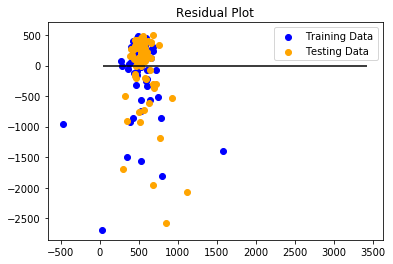

In [25]:
# Make predictions using the X_test_scaled data
# Plot y_test_scaled vs y_test_scaled
# Scatter plot y_test_scaled vs predictions

### BEGIN SOLUTION
predictions = model.predict(X_test)
# model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Residual Plot")
plt.show()
### END SOLUTION

In [26]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

### BEGIN SOLUTION
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test, y_test)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 358978.20940046385, R2: 0.16908299941274307


In [107]:
#2 timeshift 2
# new_ml_df["2_week_ago_visitors"] = 0
# for x in range(len(new_ml_df["air_area_name"])):
#     for air_id in air_uni:
#         if(new_ml_df["air_area_name"][x] == air_id):
#             if x > 0:
#                 new_ml_df["2_week_ago_visitors"][x] = new_ml_df["1_week_ago_visitors"][x-1]
# new_ml_df.head(5)

In [45]:
# new_ml_df["2_week_ago_diff_2_week_ago_visitors"] = new_ml_df["2_week_ago_visitors"] - new_ml_df["1_week_ago_visitors"]

In [176]:
#
df = pd.read_csv(os.path.join("air_jordan.csv"))
df = df.drop(columns='Unnamed: 0')
df.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg
0,air_ba937bf13d40fb24,2016-01-13,25,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
1,air_25e9888d30b386df,2016-01-13,21,Izakaya,Tōkyō-to Shinagawa-ku Higashigotanda,35.626568,139.725858,Wednesday,0
2,air_fd6aac1043520e83,2016-01-13,40,Izakaya,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
3,air_64d4491ad8cdb1c6,2016-01-13,5,Dining bar,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Wednesday,0
4,air_ee3a01f0c71a769f,2016-01-13,18,Cafe/Sweets,Shizuoka-ken Hamamatsu-shi Motoshirochō,34.710895,137.725940,Wednesday,0


In [80]:
#Normalize
no_zeroes_three_clean_ml_df.head(5)

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
3,62,3,1999,2095,-96
56,75,3,146,121,25
109,37,3,990,887,103
162,0,3,3433,3238,195
215,29,3,595,606,-11


In [112]:
from sklearn import preprocessing
import numpy as np
arr = np.array(no_zeroes_three_clean_ml_df['air_area_name']).reshape(-1,1)
no_zeroes_three_clean_ml_df['new'] = preprocessing.normalize(arr)
no_zeroes_three_clean_ml_df.head(5)
no_zeroes_three_clean_ml_df.loc[no_zeroes_three_clean_ml_df['current_week'] < 0]

C:\Users\Link\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors,new


In [94]:
def min_max_normalize(lst):
    minimum = min(lst)
    maximum = max(lst)
    normalized = []
    for val in lst:
        normalized.append((val-minimum)/(maximum-minimum))
    return normalized

In [148]:
x = min_max_normalize(no_zeroes_three_clean_ml_df['1_week_ago_diff_1_week_ago_visitors'])
#x
new_dict = {}
#new_ls
for id in clean_ml_df.columns:
    #if id != 'current_week':
    new_dict[id] = min_max_normalize(clean_ml_df[id])
        
#new_dict['current_week'] = new_ml_df['current_week']

new_df = pd.DataFrame(new_dict)
#new_df = new_df.drop(columns='new')
new_df.head()
    

,air_area_name,current_week,visitors,1_week_ago_visitors,1_week_ago_diff_1_week_ago_visitors
0,0.607843,0.019231,0.203324,0.201089,0.711002
1,0.607843,0.038462,0.203616,0.203324,0.709118
2,0.607843,0.057692,0.194285,0.203616,0.699793
3,0.607843,0.076923,0.192730,0.194285,0.707329
4,0.607843,0.096154,0.206726,0.192730,0.722400


In [162]:
#x = min_max_normalize(no_zeroes_three_clean_ml_df['current_week'])
#del new_df
features = ['air_area_name','current_week']
X = new_df[list(features)].values
y = new_df['visitors'].values
y = y.reshape(-1,1)
y.shape
X.shape
target = new_df['visitors']
final_df = new_df.drop(columns= ['visitors','1_week_ago_diff_1_week_ago_visitors','1_week_ago_visitors'])
final_df.head()


,air_area_name,current_week
0,0.607843,0.019231
1,0.607843,0.038462
2,0.607843,0.057692
3,0.607843,0.076923
4,0.607843,0.096154


In [163]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_df, target, random_state=42)

KNN Attempt

In [164]:
from sklearn.neighbors import KNeighborsRegressor

In [180]:
#Unweighted regressor
regressor = KNeighborsRegressor(n_neighbors=17)
#Weighted regressor
regressor_w = KNeighborsRegressor(n_neighbors=5, weights='distance')

In [181]:
regressor.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                    weights='uniform')

In [182]:
#plt.scatter(X_train, y_train)
#plt.show()
#print(X_train.shape, y_train.shape)
prediction_test = regressor.predict(X_test)
prediction_train = regressor.predict(X_train)

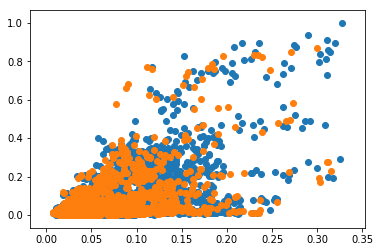

In [183]:
#plt.scatter(y_test,prediction )
plt.scatter(prediction_train, y_train )
plt.scatter(prediction_test, y_test)
plt.show()


In [184]:
regressor_w.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='distance')

In [185]:
prediction_test_w = regressor_w.predict(X_test)
prediction_train_w = regressor_w.predict(X_train)

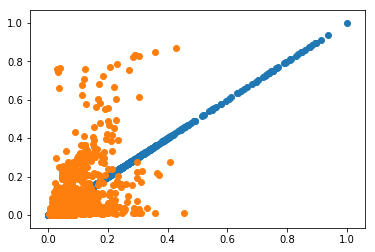

In [186]:
#plt.scatter(y_test,prediction )
plt.scatter(prediction_train_w, y_train )
plt.scatter(prediction_test_w, y_test)
plt.show()

In [187]:
regressor.score(X_train, y_train)

0.2911081230201623

In [188]:
regressor.score(X_test, y_test)

0.2417781354247449

k: 1, Train/Test Score: 1.000/-0.616
k: 3, Train/Test Score: 0.592/0.417
k: 5, Train/Test Score: 0.623/0.302
k: 7, Train/Test Score: 0.440/0.161
k: 9, Train/Test Score: 0.321/0.099
k: 11, Train/Test Score: 0.289/0.136
k: 13, Train/Test Score: 0.280/0.166
k: 15, Train/Test Score: 0.281/0.207
k: 17, Train/Test Score: 0.291/0.242
k: 19, Train/Test Score: 0.294/0.228


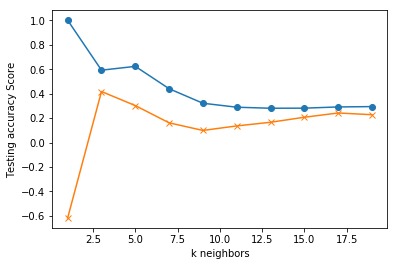

In [179]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()